لود کردن دیتا ست

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

اندازه ی ستون هدف

In [15]:
print(f'column target of iris dataset {len(iris.target)}')

column target of iris dataset 150


ابعاد داده ها

In [10]:
print(f'column data of iris dataset {(iris.data.shape)}')

column data of iris dataset (150, 4)


نام های ستون ها

In [17]:
print(f'name column  of iris dataset {(iris.feature_names)}')

name column  of iris dataset ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


دو تا ستون اول

In [22]:
import pandas as pd


#load data into a DataFrame object:
df = pd.DataFrame(iris.data).iloc[: , :2]

print(df)

       0    1
0    5.1  3.5
1    4.9  3.0
2    4.7  3.2
3    4.6  3.1
4    5.0  3.6
..   ...  ...
145  6.7  3.0
146  6.3  2.5
147  6.5  3.0
148  6.2  3.4
149  5.9  3.0

[150 rows x 2 columns]


نمایش خانه های خالی

In [23]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Show the number of free (missing) cells
missing_cells = iris_df.isnull().sum().sum()
print(f"Number of free (missing) cells: {missing_cells}")

Number of free (missing) cells: 0


نمایش اطلاعات اماری

In [24]:
# Show statistical information
print("\nStatistical information:")
print(iris_df.describe())


Statistical information:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
نمایش نمودار نقطه ای

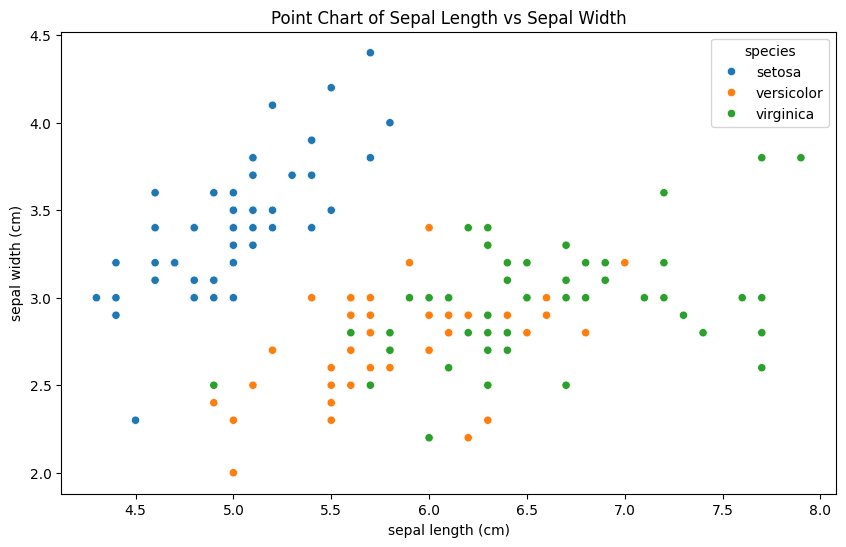

In [27]:
# Show point chart and histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df)
plt.title('Point Chart of Sepal Length vs Sepal Width')
plt.show()

نمایش هیستوگرام

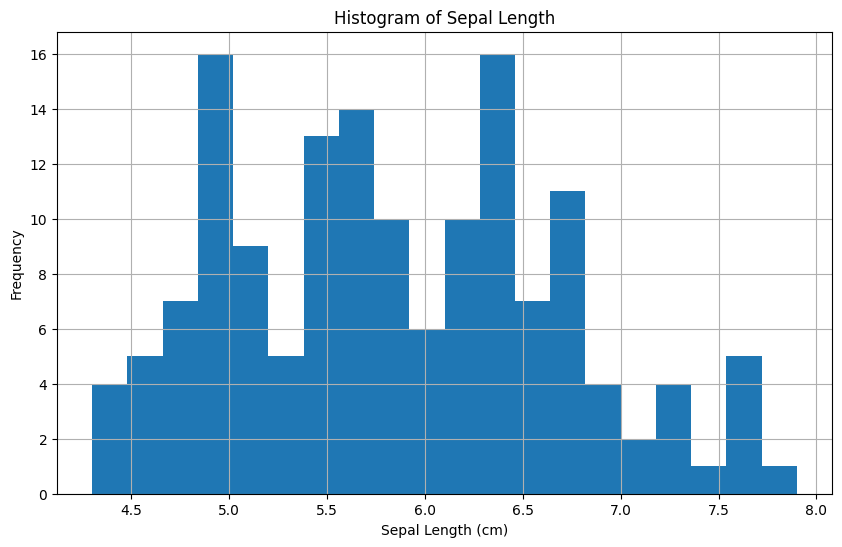

In [28]:
plt.figure(figsize=(10, 6))
iris_df['sepal length (cm)'].hist(bins=20)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


نمایش سه سطر اول و اخر داده

In [29]:

# Display the first and last 3 lines of data
print("\nFirst 3 lines of data:")
print(iris_df.head(3))

print("\nLast 3 lines of data:")
print(iris_df.tail(3))


First 3 lines of data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  

Last 3 lines of data:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
147  virginica  
148  virginica  
149  virginica  


مرتب سازی نزولی بر اساس اندازه عرض کاسبرگ

In [30]:
# Descending sorting by sepal width
sorted_iris_df = iris_df.sort_values(by='sepal width (cm)', ascending=False)
print("\nData sorted by sepal width (descending):")
print(sorted_iris_df.head())



Data sorted by sepal width (descending):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
33                5.5               4.2                1.4               0.2   
32                5.2               4.1                1.5               0.1   
14                5.8               4.0                1.2               0.2   
16                5.4               3.9                1.3               0.4   

   species  
15  setosa  
33  setosa  
32  setosa  
14  setosa  
16  setosa  


پیدا کردن ضریب همبسنگی بین طول و عرض کاسبرگ

In [31]:
# Calculation of the correlation coefficient of the length and width data of sepals
correlation_coefficient = iris_df['sepal length (cm)'].corr(iris_df['sepal width (cm)'])
print(f"\nCorrelation coefficient between sepal length and sepal width: {correlation_coefficient}")


Correlation coefficient between sepal length and sepal width: -0.11756978413300208


با استفاده از روش رگرسیون خطی مجموعه داده ای مشابه پیش بینی قد از روی وزن با حداقل ۳۰ داده پیاده سازی نمایید

Coefficient: 0.39720169887413626
Intercept: 58.0538666217784
Mean squared error: 58.54933080034169
Coefficient of determination (R^2): 0.5980647604252409


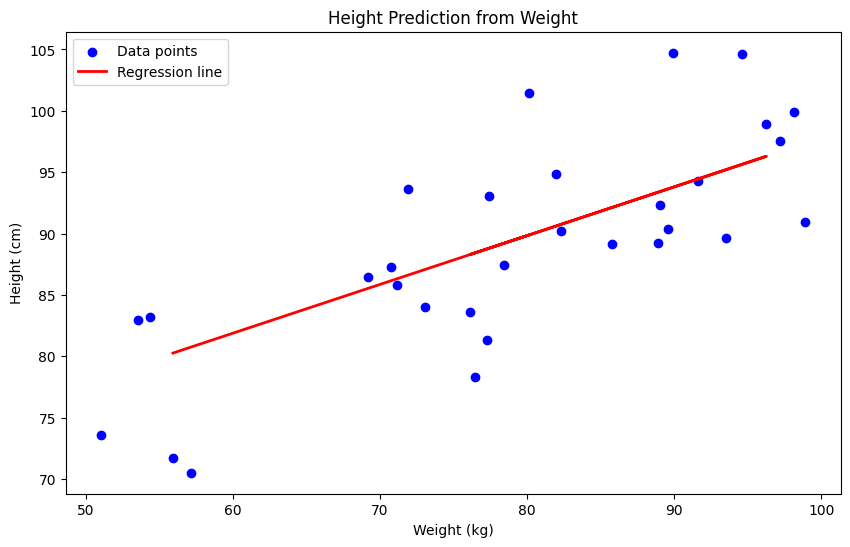

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(0)
weights = np.random.uniform(50, 100, 30)  # Generate 30 random weights between 50 and 100 kg
heights = 50 + 0.5 * weights + np.random.normal(0, 5, 30)  # Generate heights with some noise

# Create a DataFrame
data = pd.DataFrame({'Weight': weights, 'Height': heights})

# Split the data into training and testing sets
X = data[['Weight']]
y = data['Height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Display the coefficients
print(f'Coefficient: {model.coef_[0]}')

# Calculate and print the mean squared error and the coefficient of determination
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse}')
print(f'Coefficient of determination (R^2): {r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Height Prediction from Weight')
plt.legend()
plt.show()
